## Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Student Performance Indicator

### 1. Problem Statement 
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
- [Dataset Source](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

### Read the Data

In [5]:
import os 
os.getcwd()

'E:\\end-to-end-machine-learning-project\\student-performance-prediction\\notebooks'

In [6]:
data_file_path = r"data/students.csv"
df = pd.read_csv(data_file_path)

In [7]:
# First 5 rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Dataset Column Information 
--- 
- gender : sex of the students
- race_ethnicity : ethnicity of students
- parental_level_of_education : parents education level
- lunch : having lunch before test
- test preparation course : complete or not complete before test
- math_score : students mark in math subject
- reading_score : students mark in reading
- writing_score : students mark in writing

### TODO 
--- 
1. Check missing values
2. Check duplicate values
3. Check data types
4. Check number of unique values in each column
5. Check statistics of each column
6. Do data visualization to get insights
7. Store the insights and problems for solving later.

## Problems/Issues/Insights


- There is no missing values in any columns
- There is no duplicate rows / columns

#### Gender Column
--- 
- No missing values
- there are total 518 female students(51.80%) and 482 male students(48.20%) so balanced.
- 


In [10]:
# check missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
# check duplicate rows  
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [61]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Note based on describe method: 
1. all math reading and writting score mean and std are very close to each other. mean in 66 to 70 range and std in around 15
2. all Q1 , Q2 and Q3 are also close to each other
3. maximun people did bad in math cause min score is 0 where for reading min is 17 and and writting 10
4. There are also 3 people who score full marks in all test and their parents education is bachelors and associate's also they all take standard lunch and they are from group E.

In [63]:
df[(df['math_score'] == 100) & (df['reading_score'] == 100) & (df['writing_score'] == 100)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


<h3> Let's Go through each column one by one

In [14]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

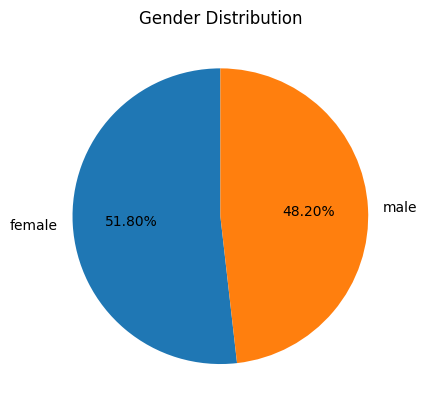

In [16]:
gender_counts = df['gender'].value_counts()

plt.pie(gender_counts , labels = gender_counts.index , autopct = "%1.2f%%" , startangle = 90)
plt.title("Gender Distribution")
plt.show()

<h4> race_ethnicity column 

In [18]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

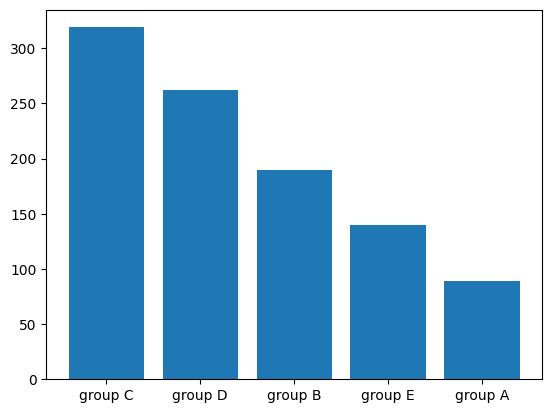

In [22]:
group_counts = df['race_ethnicity'].value_counts() 
plt.bar(group_counts.index , group_counts.values)
plt.show()

<h4> parental_level_of_education

In [24]:
df['parental_level_of_education'].dtype

dtype('O')

In [25]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

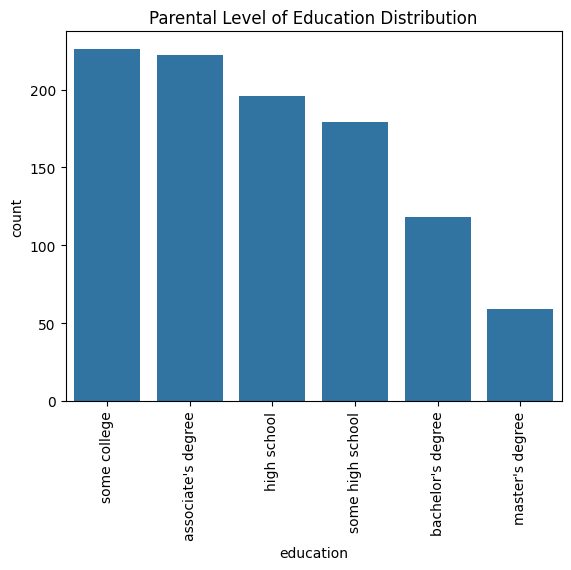

In [31]:
edu_counts = df['parental_level_of_education'].value_counts().reset_index()
edu_counts.columns = ['education', 'count']

sns.barplot(x = 'education', y = 'count', data = edu_counts)
plt.xticks(rotation = 90)
plt.title("Parental Level of Education Distribution")
plt.show()

<h3> lunch column

In [32]:
df['lunch'].dtype

dtype('O')

In [33]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [34]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

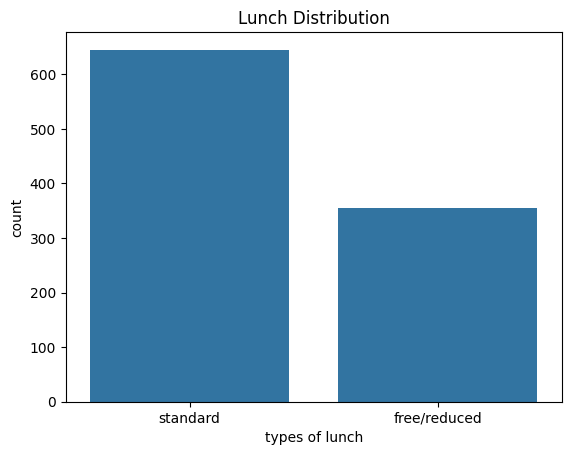

In [35]:
sns.countplot(data = df , x = "lunch")
plt.title("Lunch Distribution")
plt.xlabel("types of lunch")
plt.ylabel("count")
plt.show()

In [36]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

<h3> test_preparation_course column

In [38]:
df['test_preparation_course'].dtypes

dtype('O')

In [39]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

<h3> math_score column

In [40]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [44]:
df[df['math_score'] == 0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10


In [46]:
df[df['math_score'] == 100]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [47]:
df[df['math_score'] == 100].shape

(7, 8)

In [48]:
df[df['math_score'] >= 80]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
35,male,group E,associate's degree,standard,completed,81,81,79
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91,95,94
981,male,group D,some high school,standard,none,81,78,78
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75


In [52]:
df[df['math_score'] < 20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


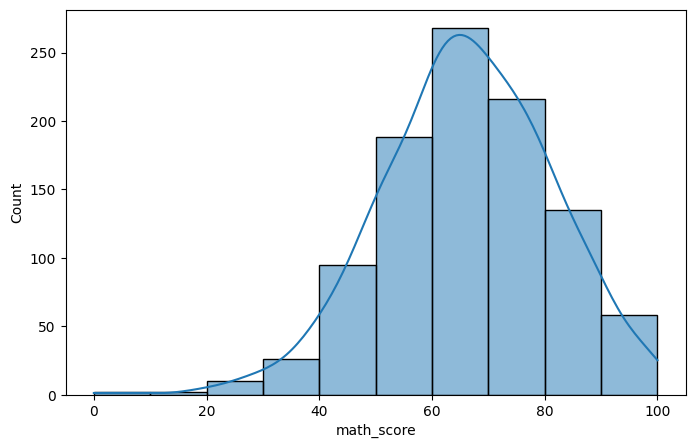

In [56]:
plt.figure(figsize = (8 , 5))
sns.histplot(df['math_score'] , bins = 10 , kde = True)
plt.show()

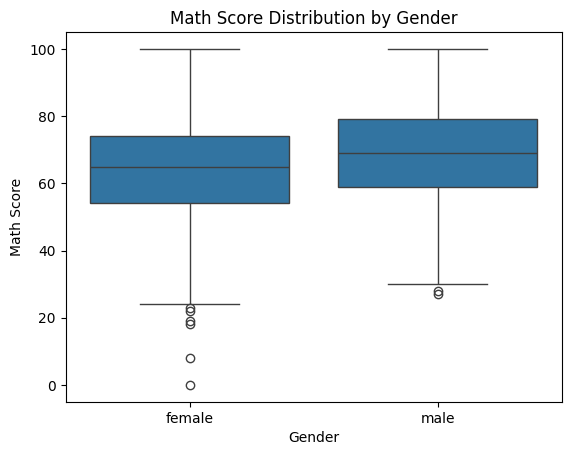

In [58]:
sns.boxplot(x = 'gender', y = 'math_score', data = df)
plt.title("Math Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

<h3> reading_score column

In [60]:
df['reading_score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

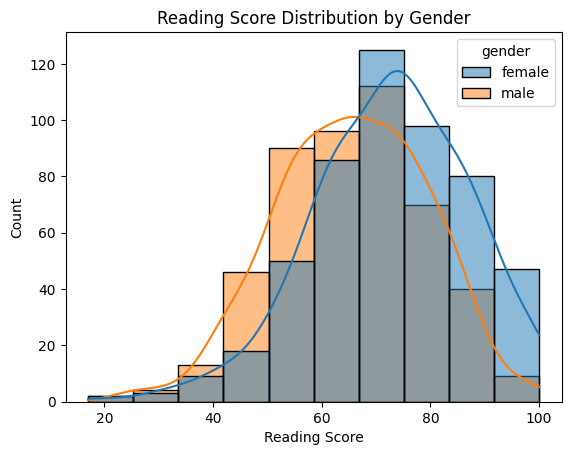

In [64]:
sns.histplot(data = df , x = 'reading_score' , hue = 'gender' , kde = True , bins = 10)
plt.title("Reading Score Distribution by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Count")
plt.show()

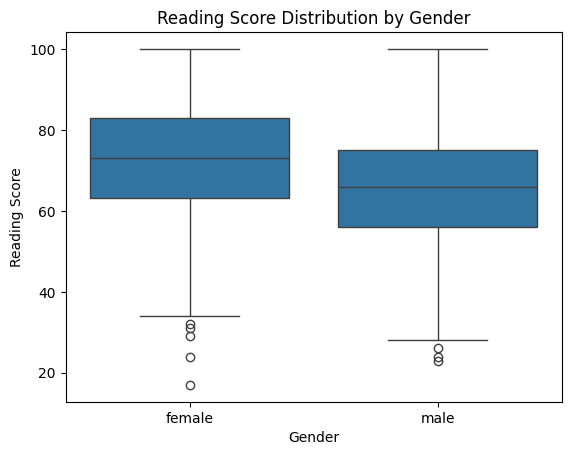

In [68]:
sns.boxplot(x = 'gender', y = 'reading_score', data = df)
plt.title("Reading Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.show()

In [70]:
df[(df['gender'] == 'female') & (df['reading_score'] < 30)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
601,female,group C,high school,standard,none,29,29,30
980,female,group B,high school,free/reduced,none,8,24,23


<h3> writing_score column

In [67]:
df['writing_score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

In [74]:
df[df['writing_score'] < 20]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


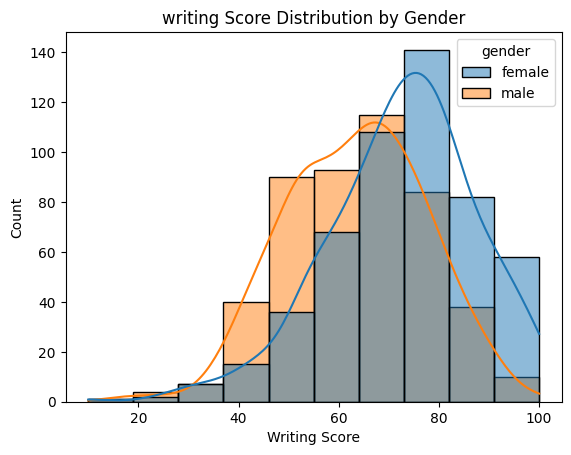

In [77]:
sns.histplot(data = df , x = 'writing_score' , hue = 'gender' , kde = True , bins = 10)
plt.title("writing Score Distribution by Gender")
plt.xlabel("Writing Score")
plt.ylabel("Count")
plt.show()

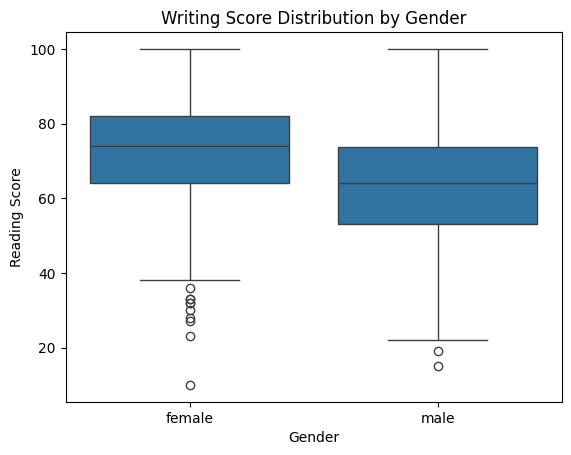

In [78]:
sns.boxplot(x = 'gender', y = 'writing_score', data = df)
plt.title("Writing Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.show()

In [79]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

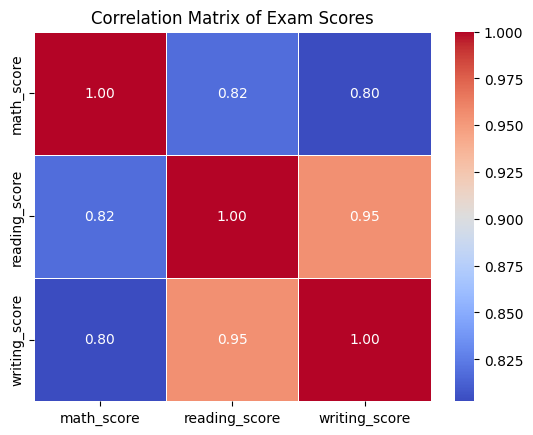

In [83]:
# check the correlation 
# plt.figure(figsize = (8 , 6))

sns.heatmap(df.corr(numeric_only = True) , cmap = 'coolwarm' , fmt = '.2f' , annot = True , linewidths = 0.5)
plt.title("Correlation Matrix of Exam Scores")
plt.show()

<h3> As 3 scores are highly correlated so we will make a single total and avg score. And this will be our target variable.

In [85]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['avg_score'] = (df['math_score'] + df['writing_score'] + df['reading_score']) / 3

In [86]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


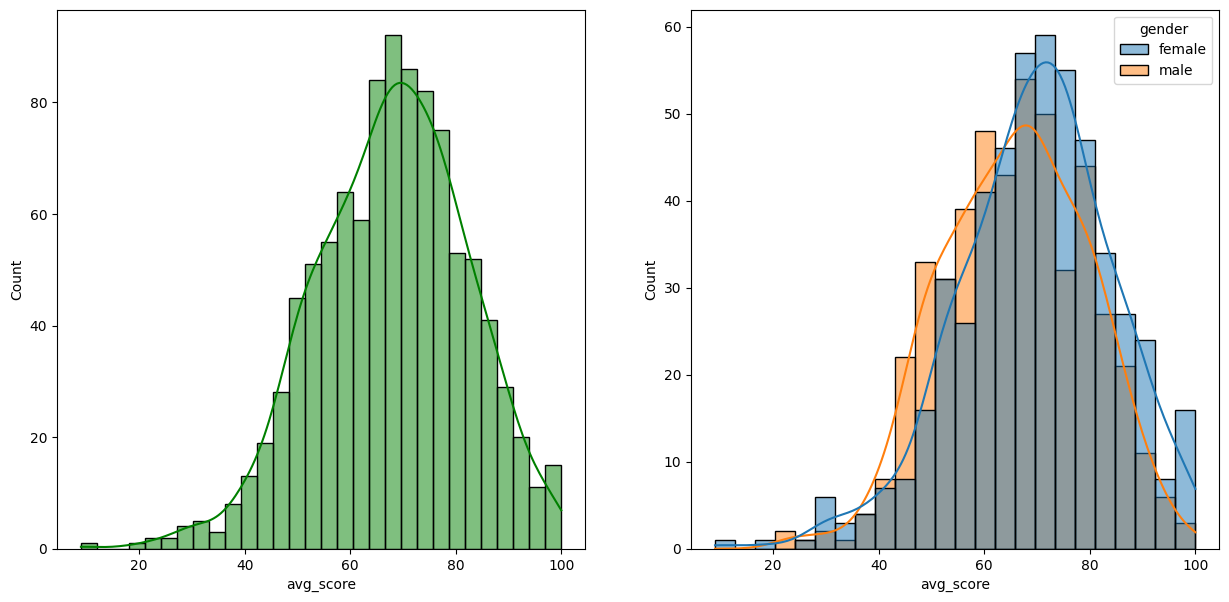

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

### Is there any impact of gender on avg_score?

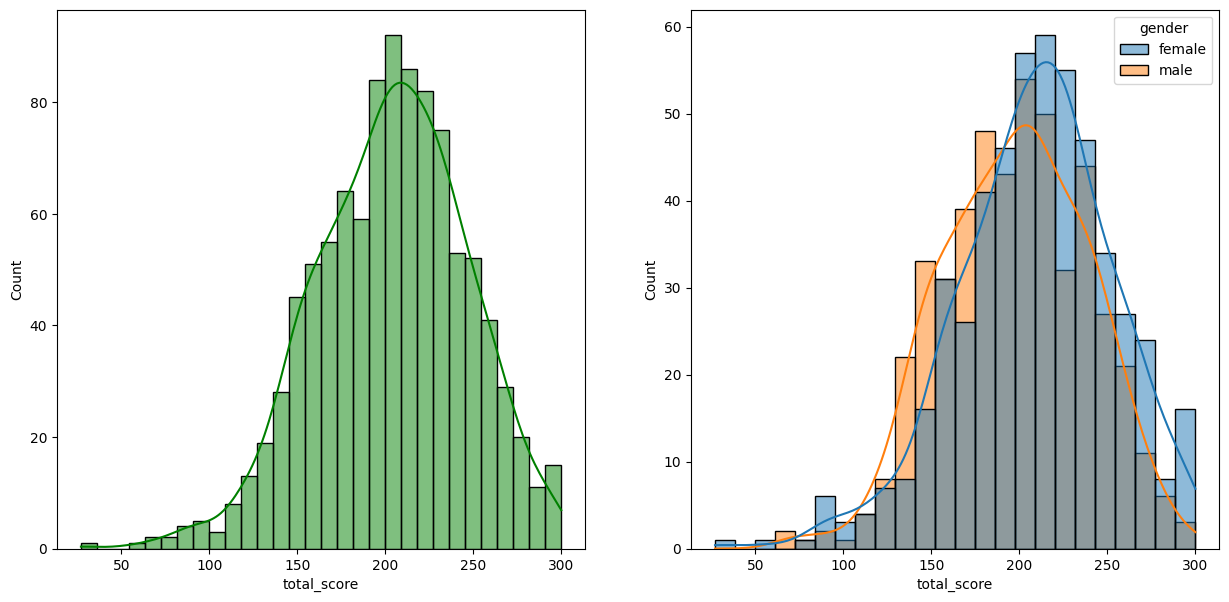

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

## avg_score and Lunch

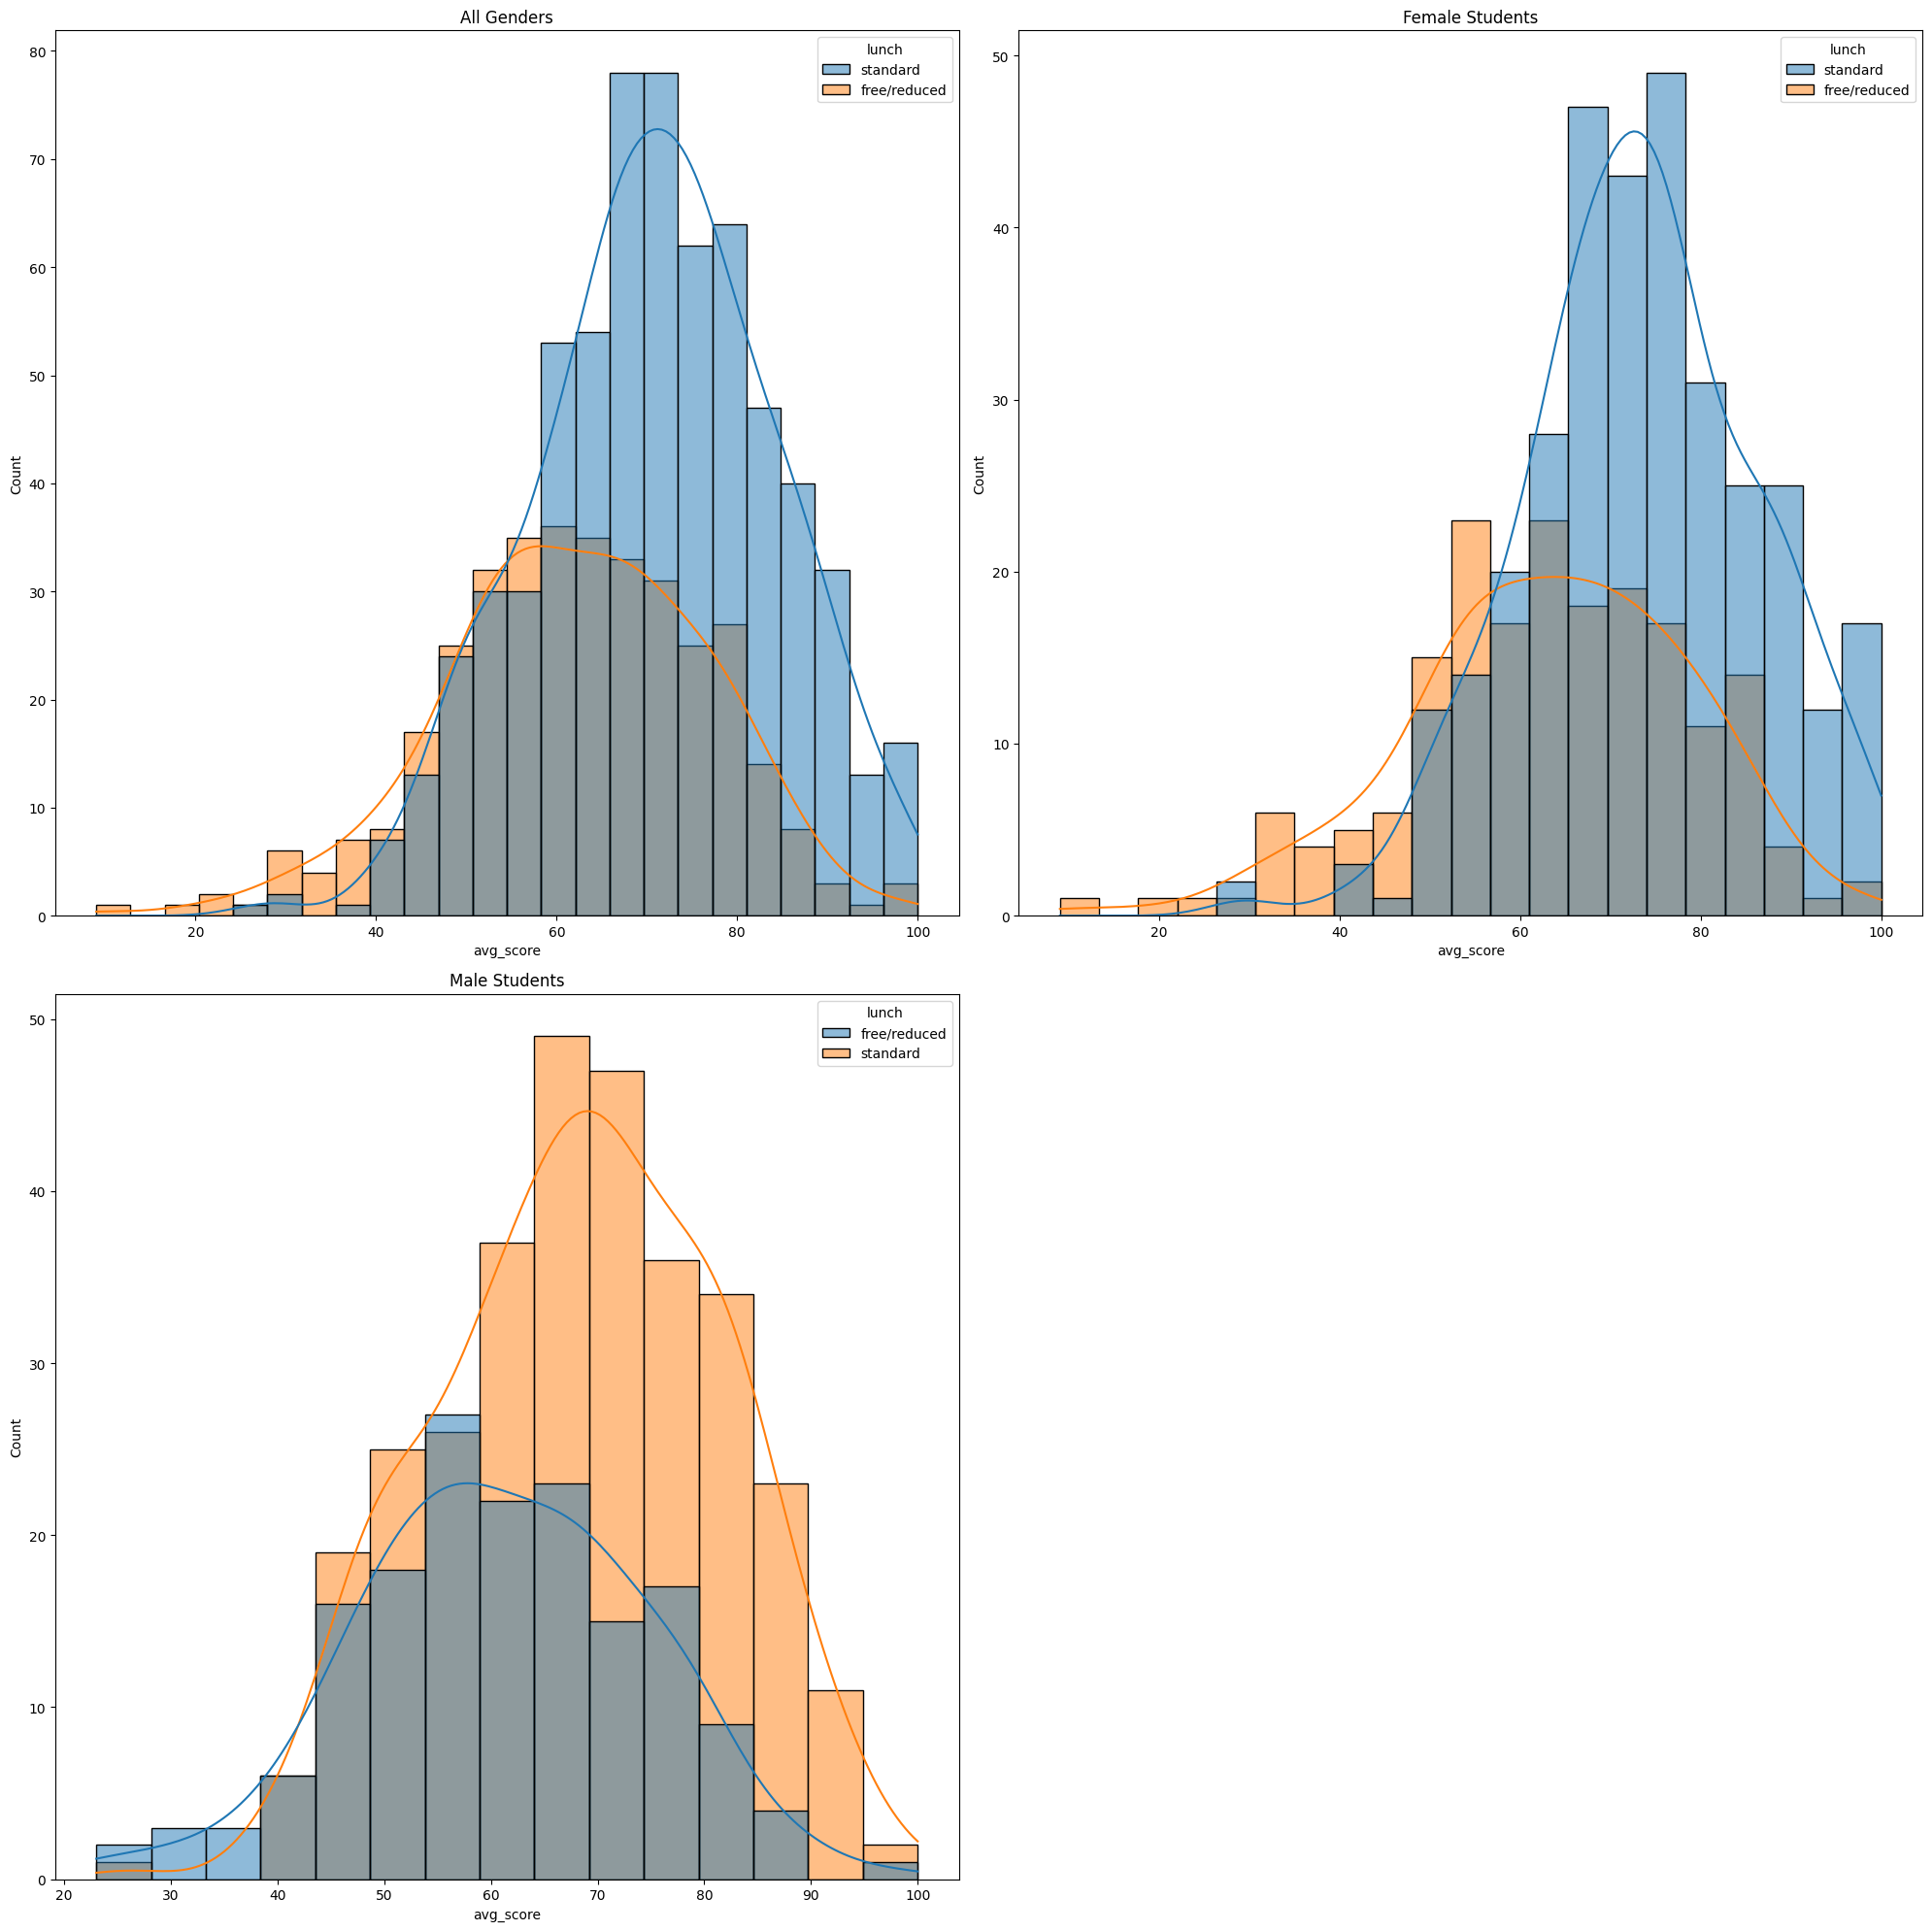

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20)) 

sns.histplot(data=df, x='avg_score', kde=True, hue='lunch', ax=axes[0, 0])
axes[0, 0].set_title('All Genders')

sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='lunch', ax=axes[0, 1])
axes[0, 1].set_title('Female Students')

sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='lunch', ax=axes[1, 0])
axes[1, 0].set_title('Male Students')

axes[1, 1].axis('off') 

plt.tight_layout()
plt.show()

## avg_score and parent education

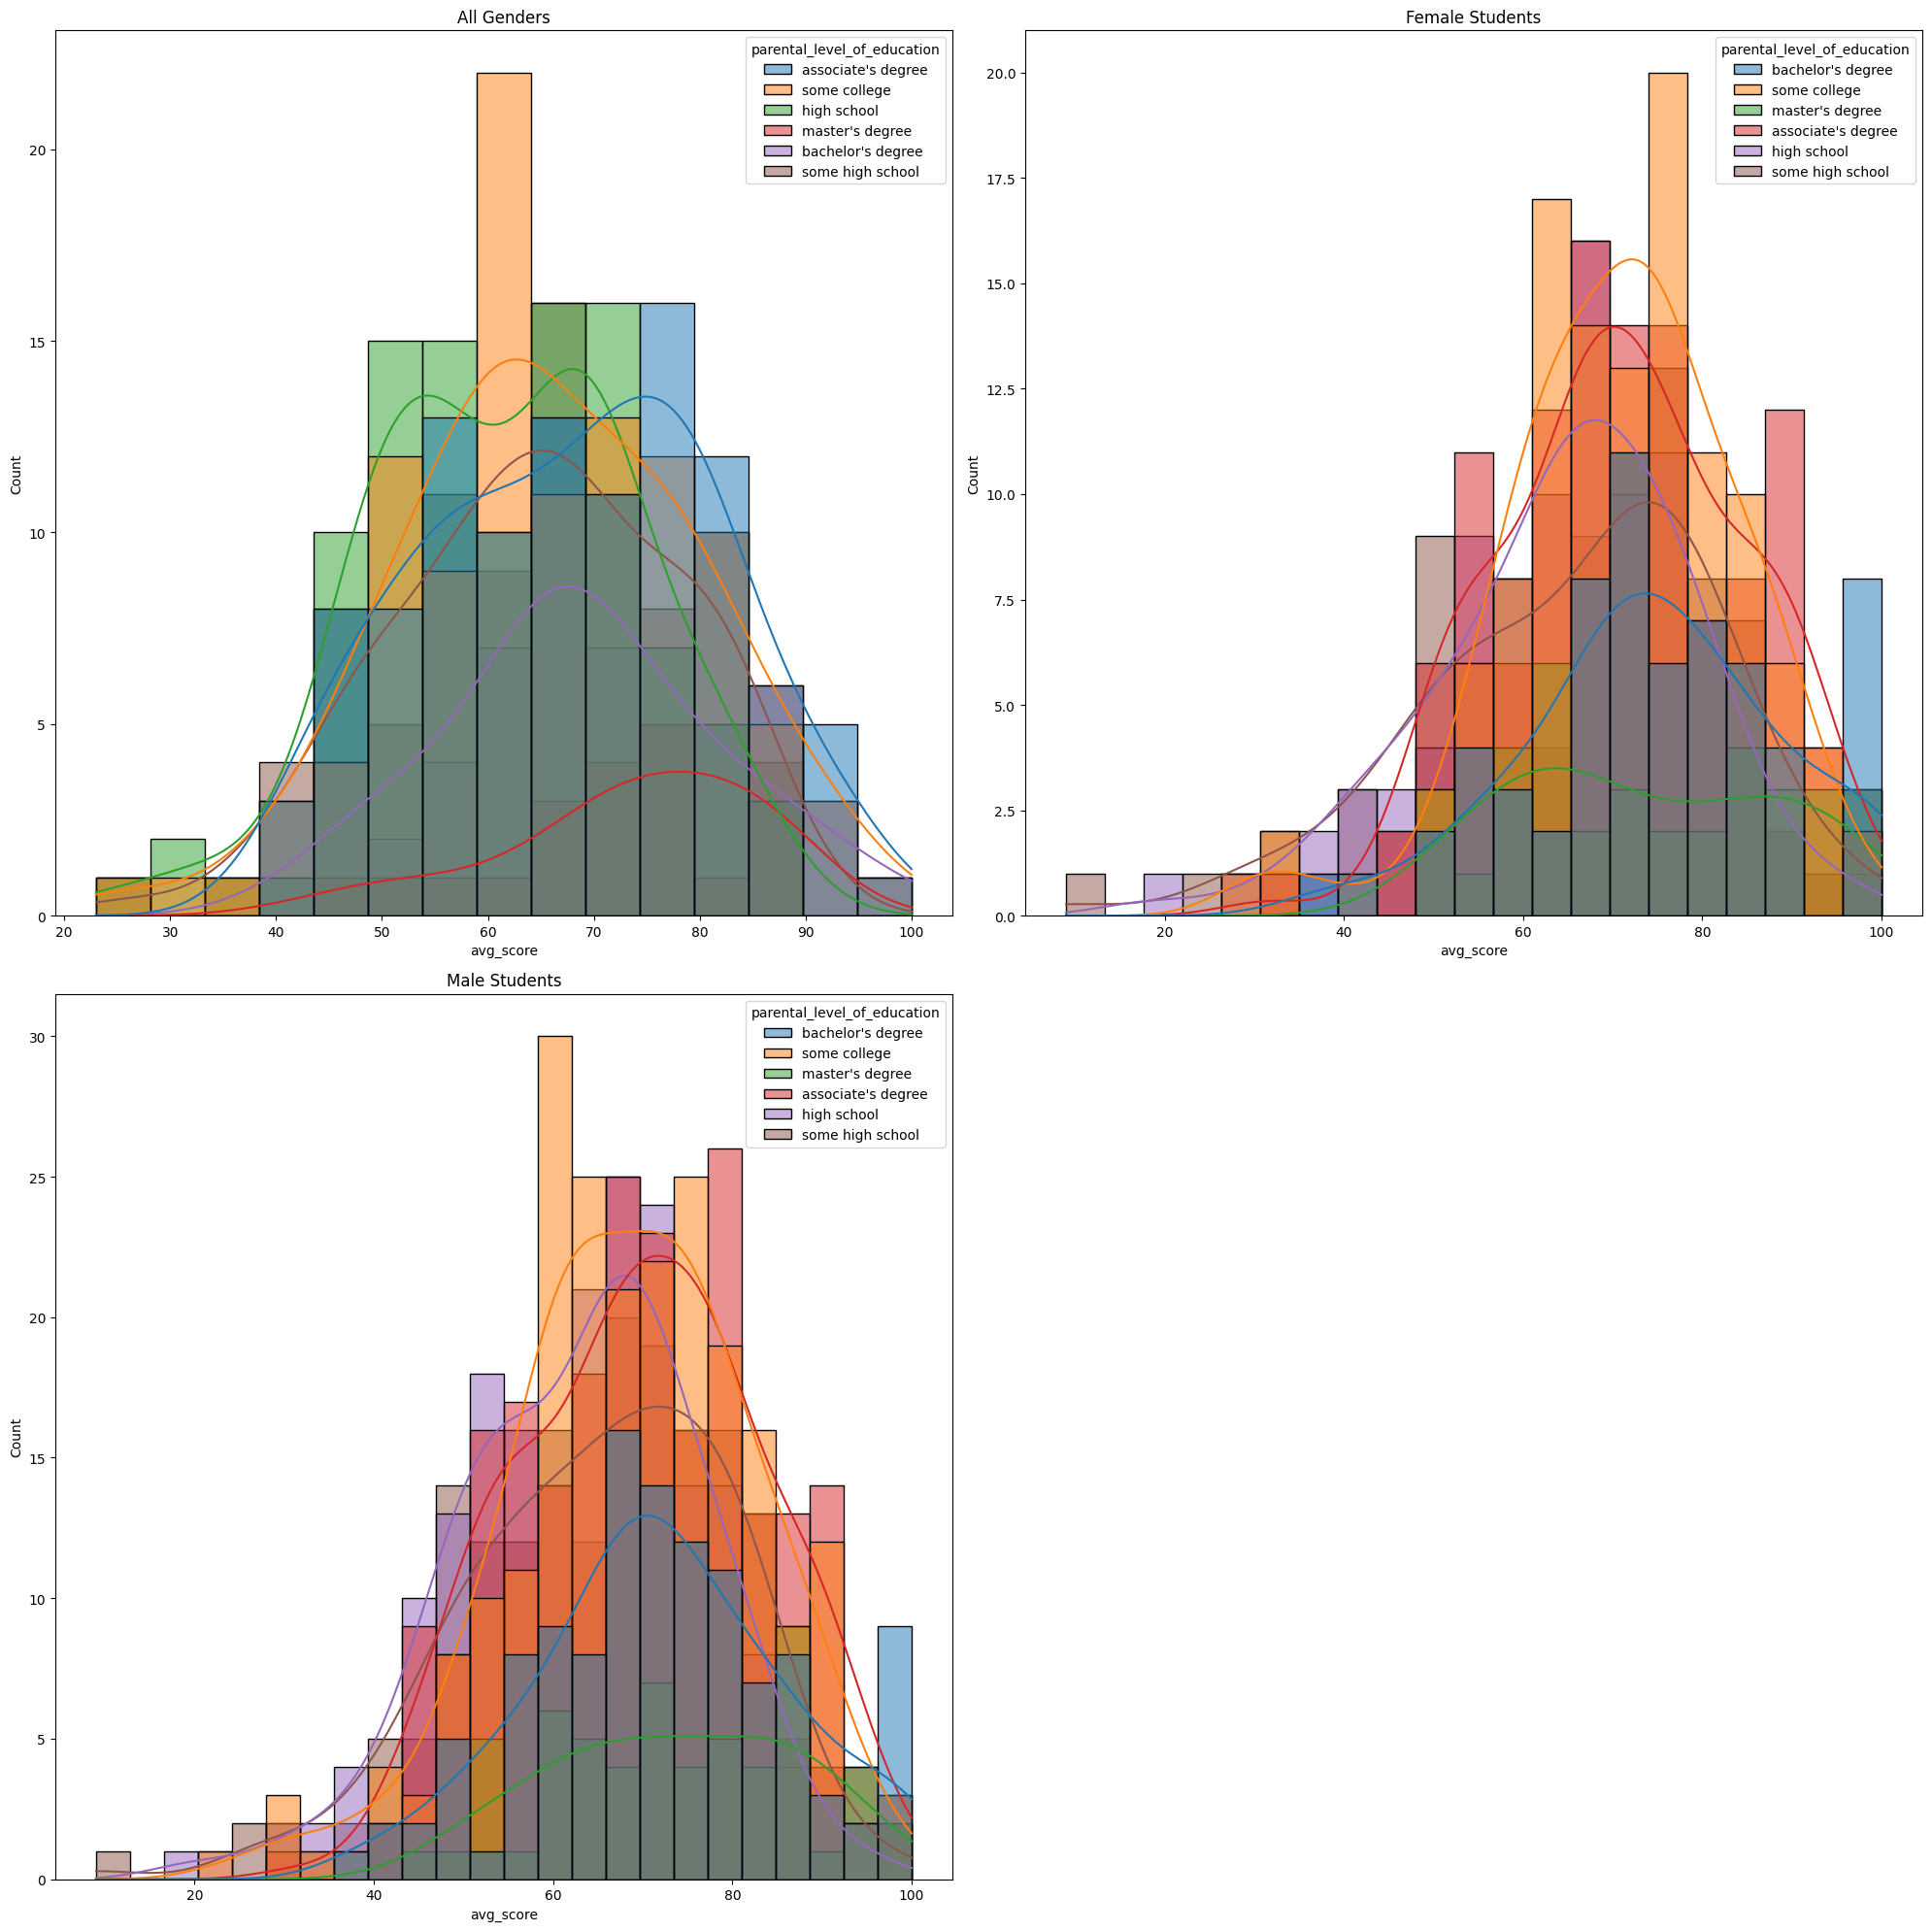

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20)) 

sns.histplot(data = df, x = 'avg_score', kde = True , hue = 'parental_level_of_education', ax = axes[1 , 0])
axes[0, 0].set_title('All Genders')

sns.histplot(data=df[df.gender == 'female'], x='avg_score', kde=True, hue='parental_level_of_education', ax=axes[0, 1])
axes[0, 1].set_title('Female Students')

sns.histplot(data=df[df.gender == 'male'], x='avg_score', kde=True, hue='parental_level_of_education', ax=axes[0 , 0])
axes[1, 0].set_title('Male Students')

axes[1, 1].axis('off') 

plt.tight_layout()
plt.show()

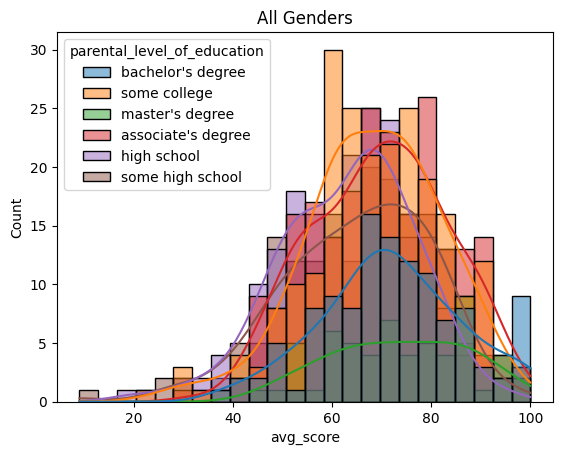

In [96]:
sns.histplot(data = df, x = 'avg_score', kde = True , hue = 'parental_level_of_education')
plt.title("All Genders")
plt.show()

## avg_score and race_ethnicity

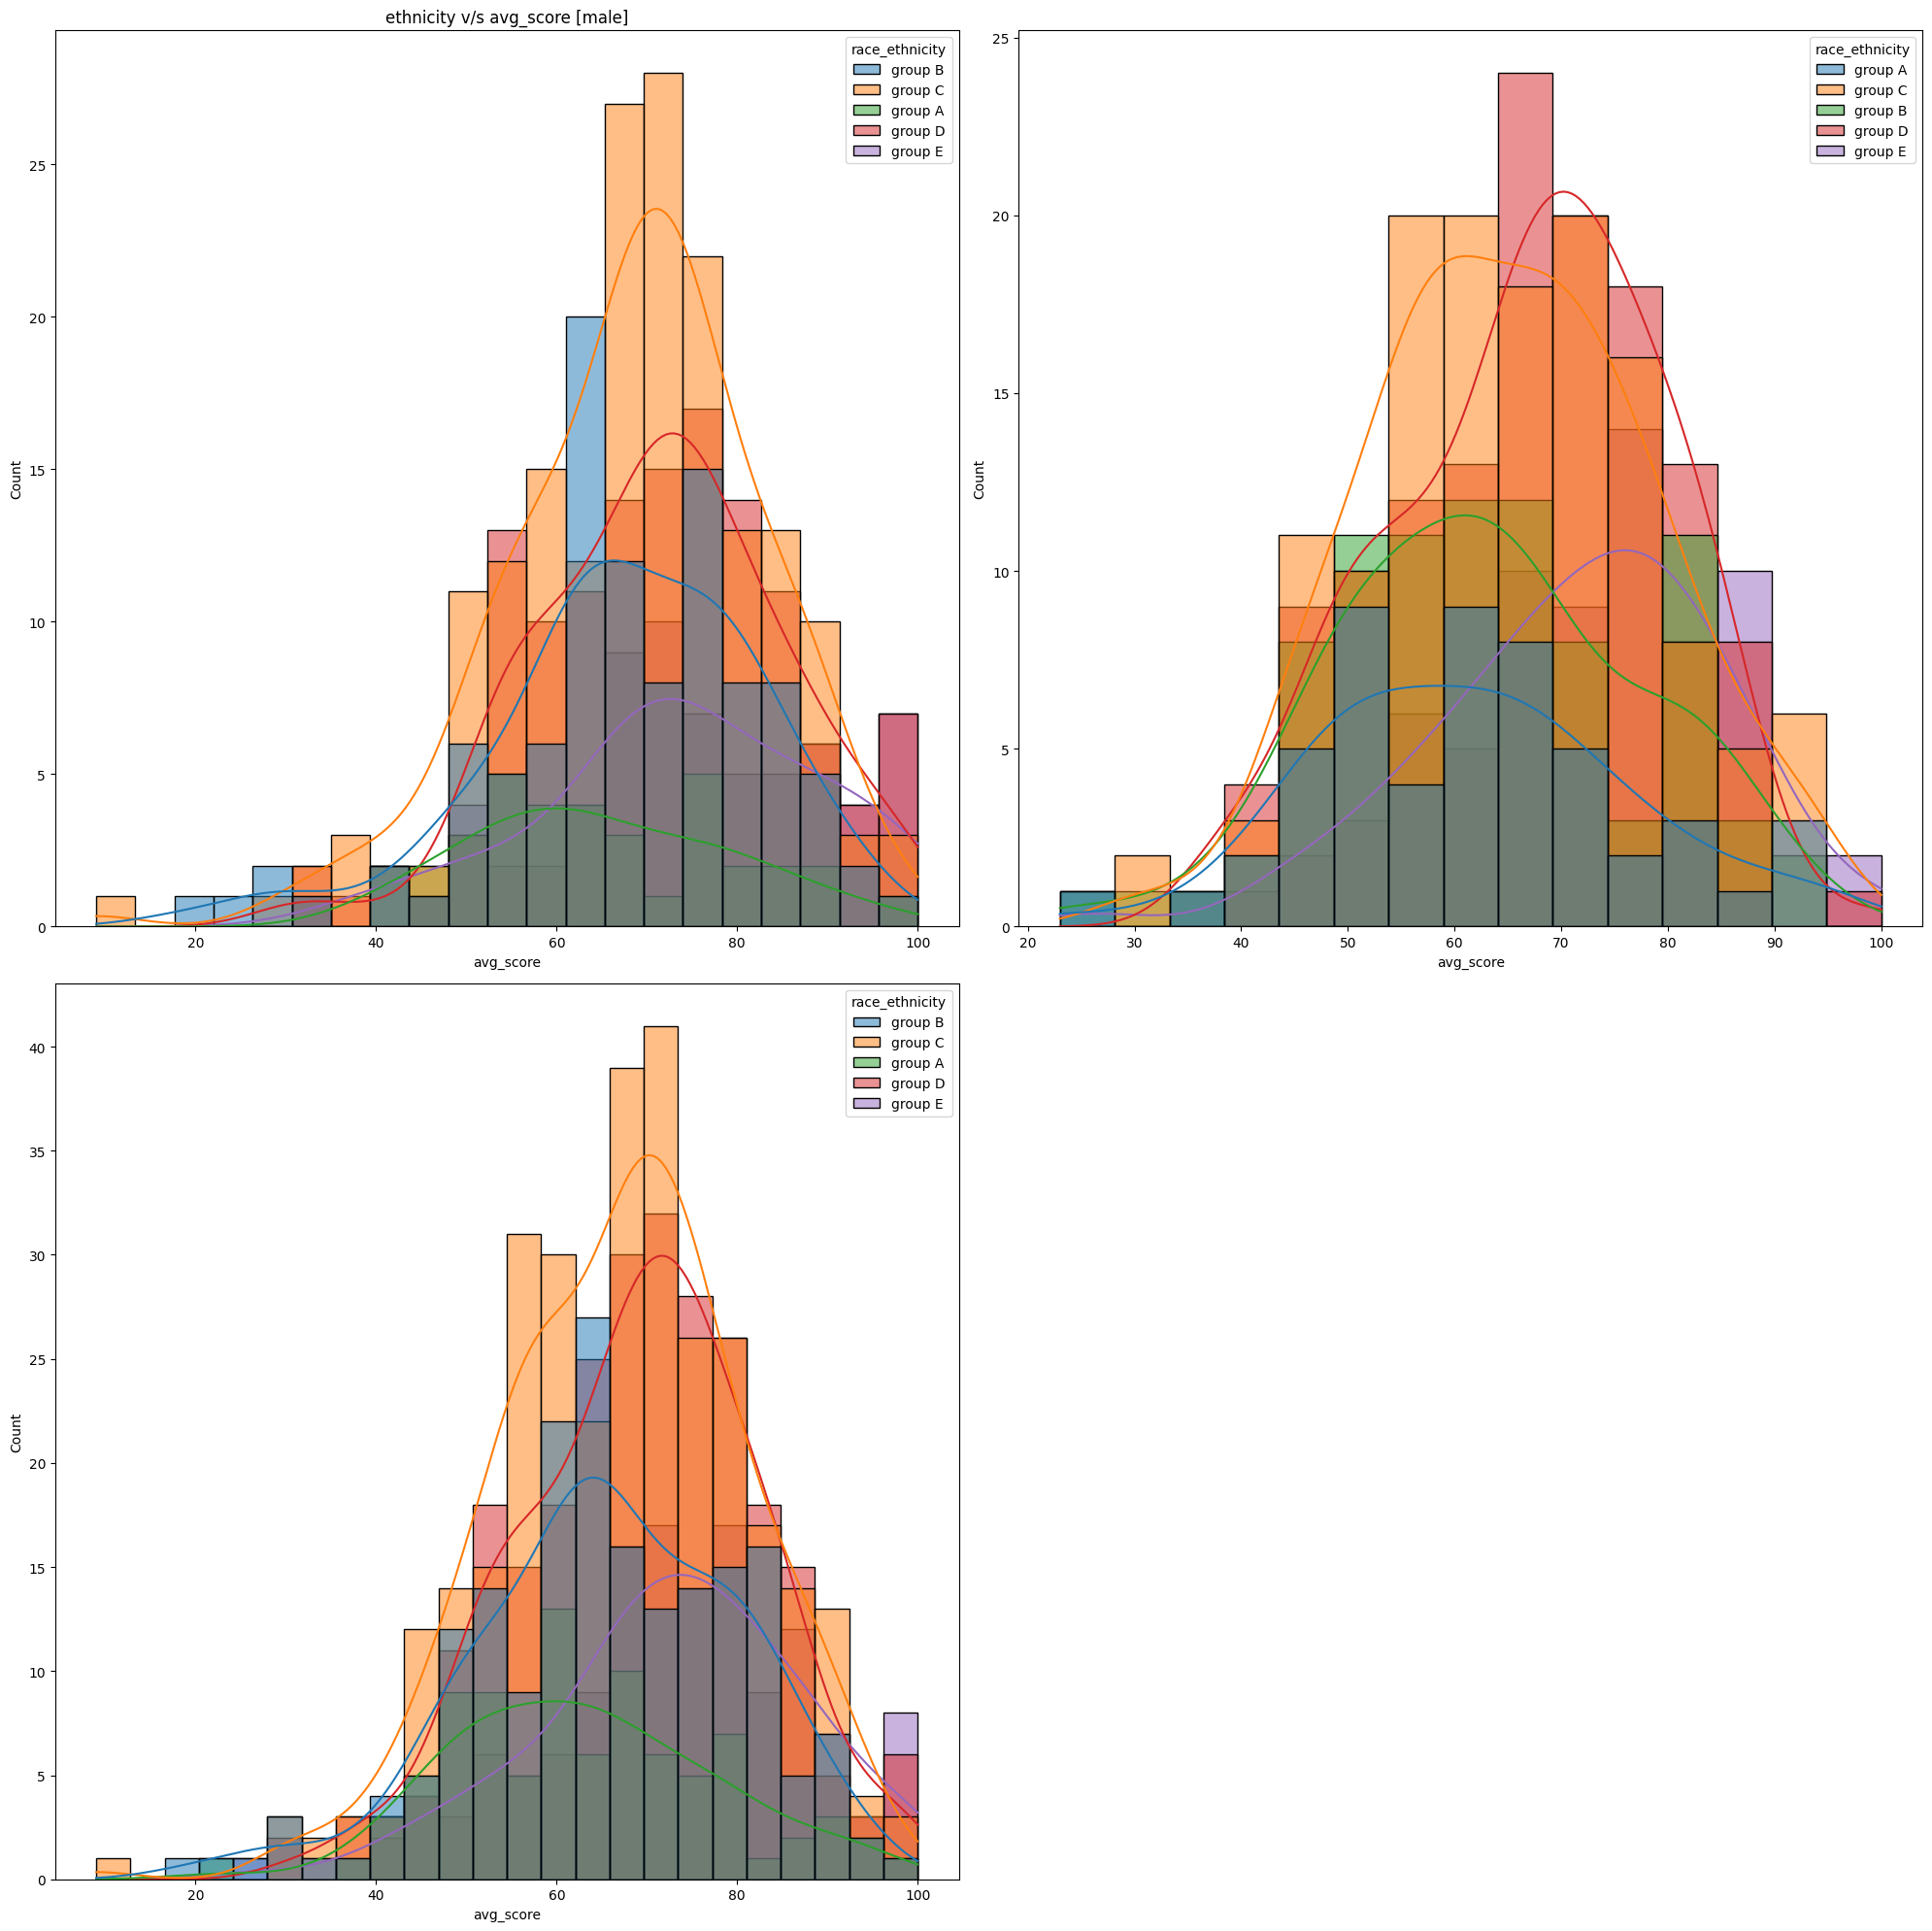

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20)) 

sns.histplot(data = df , x = 'avg_score' , hue = 'race_ethnicity' , kde = True , ax = axes[1 , 0])
axes[0 , 0].set_title("ethnicity v/s avg_score")

sns.histplot(data = df[df['gender'] == 'female'] , x = 'avg_score' , hue = 'race_ethnicity' , kde = True , ax = axes[0 , 0])
axes[0 , 0].set_title("ethnicity v/s avg_score [female]")

sns.histplot(data = df[df['gender'] == 'male'] , x = 'avg_score' , hue = 'race_ethnicity' , kde = True , ax = axes[0 , 1])
axes[0 , 0].set_title("ethnicity v/s avg_score [male]")

axes[1, 1].axis('off')

plt.tight_layout() 
plt.show()

## is there any impact of 'test_preparation_course' on 'avg_score' 

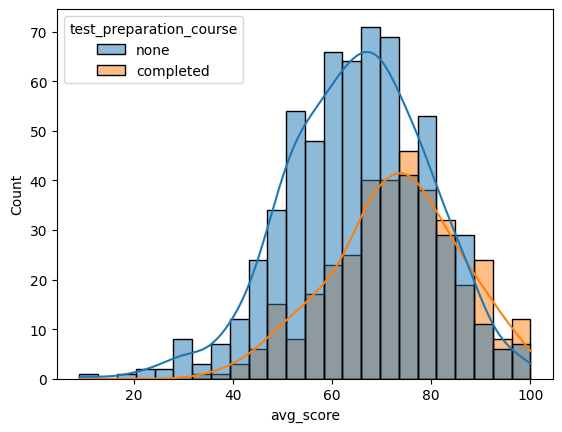

In [100]:
sns.histplot(data = df , x = 'avg_score' , hue = 'test_preparation_course' , kde = True)
plt.show()

In [97]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

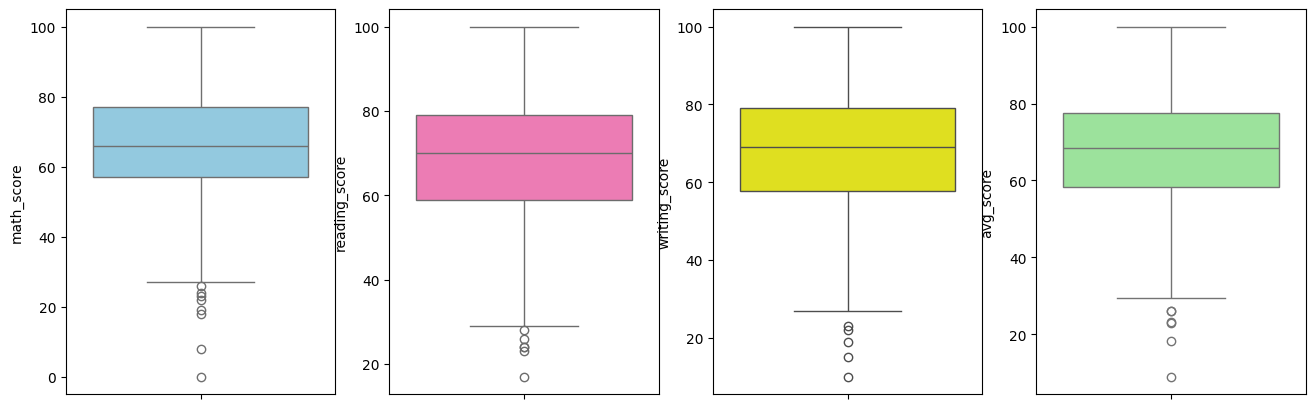

In [106]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'] , color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'] , color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'] , color = 'yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'] , color = 'lightgreen')
plt.show()

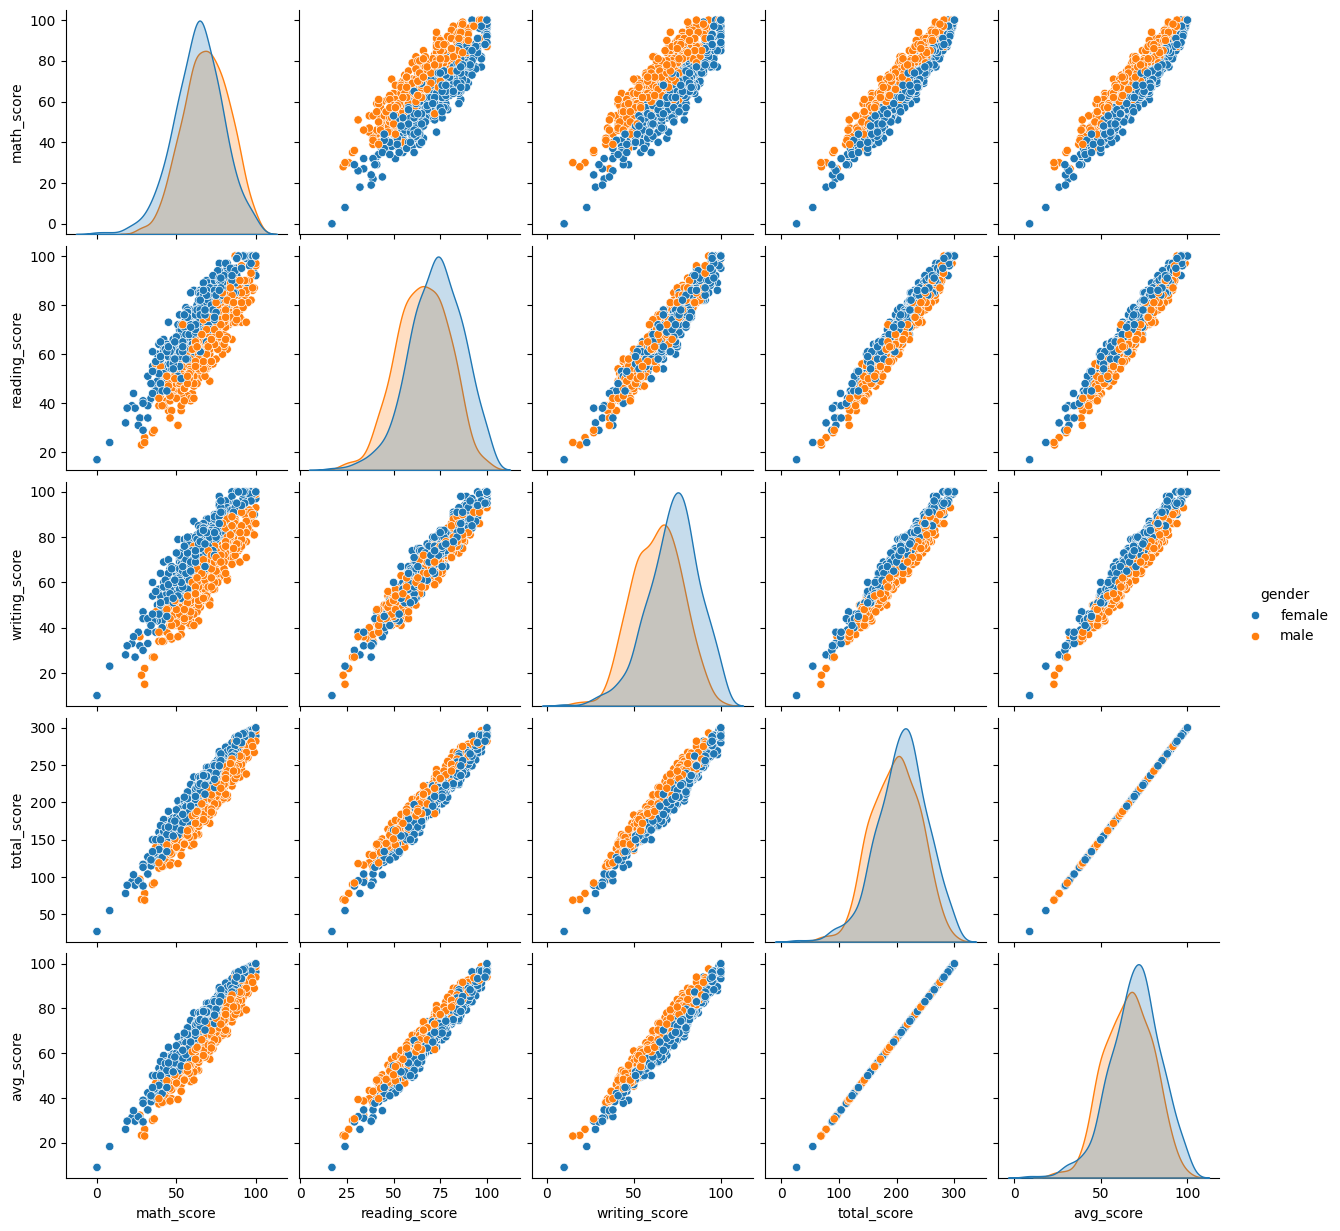

In [107]:
sns.pairplot(df,hue = 'gender')
plt.show()

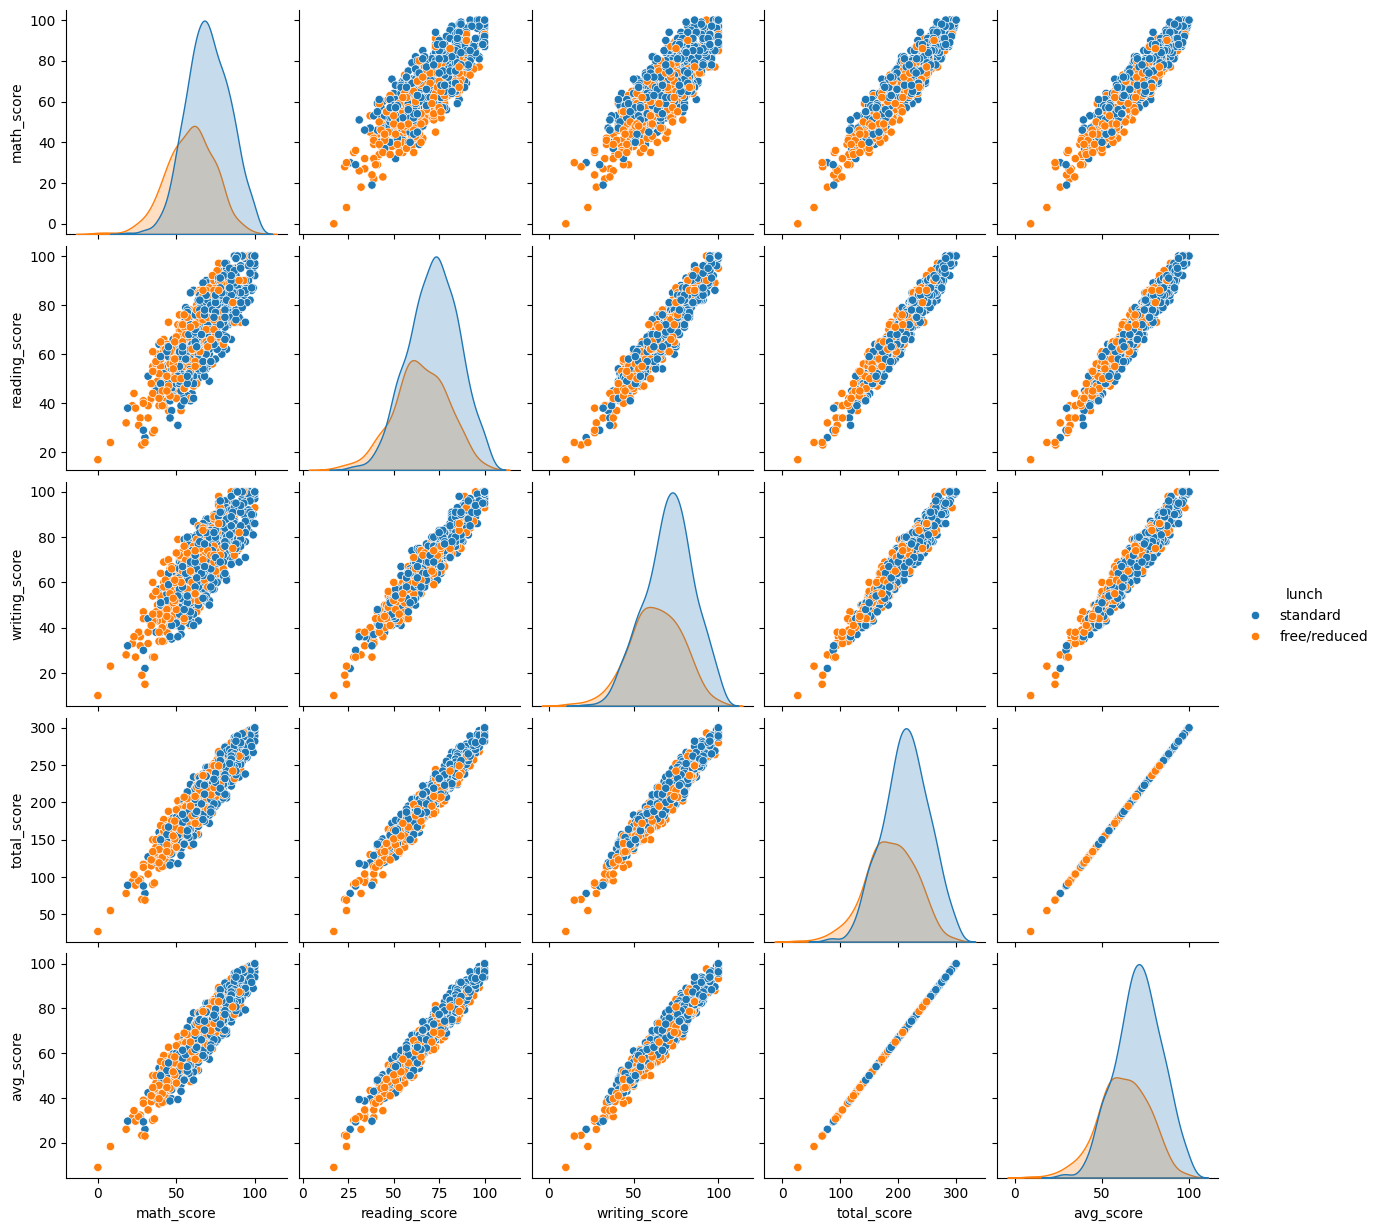

In [108]:
sns.pairplot(df , hue = 'lunch')
plt.show()

In [109]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [113]:
# store this file 
file_path = "data/data_after_eda.csv"
df.to_csv(file_path , index = False)

In [112]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
